# Challenge

1. Select variables
2. Analyze the data
3. Correlation matrix 
4. Train, test, split
5. Apply multilinear regression
6. Assess accuracy

In [44]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv("clothing.csv")

In [46]:
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [47]:
df = df.drop(['sales', 'nfull', 'npart', 'naux', 'hoursw', 'hourspw'], axis = 1)

#### Dropped data about worker type and number as issue of mutual causality ... do sales mean more workers, more workers mean more sales? 

In [48]:
df.head()

,tsales,margin,nown,inv1,inv2,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,170,41.0
1,1926395,39.0,2.0,17166.67,27177.04,450,39.0
2,1250000,40.0,1.0,292857.20,71570.55,300,40.0
3,694227,40.0,1.0,22207.04,15000.00,260,40.0
4,750000,44.0,2.0,22207.04,10000.00,50,44.0


In [49]:
df.describe()

,tsales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


# Correation matrix 

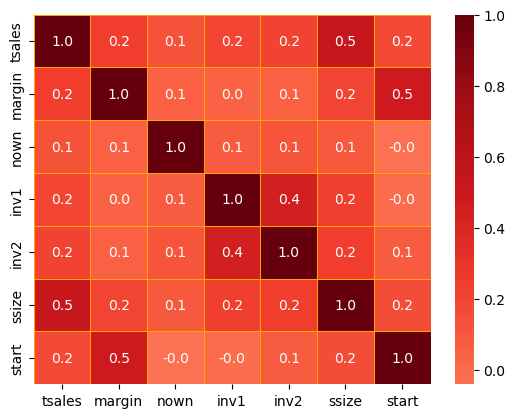

In [50]:
sns.heatmap(df.corr(),
           annot = True,
           fmt= '.1f',
           center =0,
           cmap = 'Reds',
           linewidth = 0.5,
           linecolor = 'orange')

plt.show()

In [51]:
y, x = df.tsales, df.drop(['tsales'], axis=1)

In [52]:
x.head(1)

,margin,nown,inv1,inv2,ssize,start
0,41.0,1.0,17166.67,27177.04,170,41.0


In [53]:
x = sm.add_constant(x)
x.head(1)

,const,margin,nown,inv1,inv2,ssize,start
0,1.0,41.0,1.0,17166.67,27177.04,170,41.0


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.2,
                                                   random_state = 1502)

x_train.head()

,const,margin,nown,inv1,inv2,ssize,start
201,1.0,42.0,3.0,22207.04,400000.00,400,42.0
25,1.0,35.0,1.0,62269.23,20000.00,160,35.0
94,1.0,39.0,1.0,22207.04,22859.85,200,39.0
346,1.0,47.0,1.0,292857.20,200000.00,450,47.0
121,1.0,37.0,1.0,22207.04,1200.00,350,37.0


In [55]:
y_train.head()

201    1926395
25      601000
94      976817
346    1450000
121     949840
Name: tsales, dtype: int64

In [56]:
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tsales   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     23.57
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           5.64e-23
Time:                        21:01:08   Log-Likelihood:                -4635.1
No. Observations:                 320   AIC:                             9284.
Df Residuals:                     313   BIC:                             9311.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.749e+05   2.07e+05     -0.843      0.400   -5.83e+05    2.33e+05
margin      1.027e+04   5725.687      1.793      0.074    -999.361    2.15e+04
nown        1.635e+04   5.79e+04      0.283      0.778   -9.75e+04     1.3e+05
inv1           0.1386      0.268      0.516      0.606      -0.390       0.667
inv2           0.9039      0.763      1.184      0.237      -0.598       2.406
ssize       2814.6303    291.225      9.665      0.000    2241.624    3387.637
start       3057.1045   2243.314      1.363      0.174   -1356.778    7470.987
==============================================================================
Omnibus:                      226.658   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3177.110
Skew:                           2.767   Prob(JB):                         0.00
Kurtosis:                      17.410   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
predictions = model.predict(x_test)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
print(f"MAE is £{round(mean_absolute_error(y_test, predictions), 2)}")

MAE is £346929.51


In [60]:
import math

In [61]:
print(f"RSME is £{round(math.sqrt((mean_squared_error(y_test, predictions))), 2)}")

RSME is £529017.51
